In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [57]:
data = pd.read_csv("Customer-Churn-Records.csv")
data.shape

(10000, 18)

In [58]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [59]:
# Удаление колонок с высоким процентом пропусков (более 25%)
data.dropna(axis=1, thresh=7500)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [60]:
data_to_scale = data[['Balance', 'EstimatedSalary']]
data_to_scale.describe()

,Balance,EstimatedSalary
count,10000.000000,10000.000000
mean,76485.889288,100090.239881
std,62397.405202,57510.492818
min,0.000000,11.580000
25%,0.000000,51002.110000
50%,97198.540000,100193.915000
75%,127644.240000,149388.247500
max,250898.090000,199992.480000


In [61]:
scaler1 = StandardScaler()

In [62]:
data_scaled1 = pd.DataFrame(scaler1.fit_transform(data_to_scale), columns=data_to_scale.columns)
data_scaled1.describe()

,Balance,EstimatedSalary
count,1.000000e+04,1.000000e+04
mean,-6.252776e-17,-2.877698e-17
std,1.000050e+00,1.000050e+00
min,-1.225848e+00,-1.740268e+00
25%,-1.225848e+00,-8.535935e-01
50%,3.319639e-01,1.802807e-03
75%,8.199205e-01,8.572431e-01
max,2.795323e+00,1.737200e+00


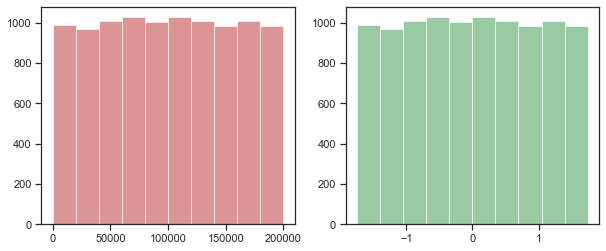

In [63]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].hist(data["EstimatedSalary"], color="r", alpha=0.6)
axs[1].hist(data_scaled1["EstimatedSalary"], color="g", alpha=0.6)
plt.show()

MinMax-масштабирование

In [64]:
scaler2 = MinMaxScaler()
data_scaled2 = pd.DataFrame(scaler2.fit_transform(data_to_scale), columns=data_to_scale.columns)
data_scaled2.describe()

,Balance,EstimatedSalary
count,10000.000000,10000.000000
mean,0.304848,0.500441
std,0.248696,0.287580
min,0.000000,0.000000
25%,0.000000,0.254977
50%,0.387402,0.500960
75%,0.508749,0.746955
max,1.000000,1.000000


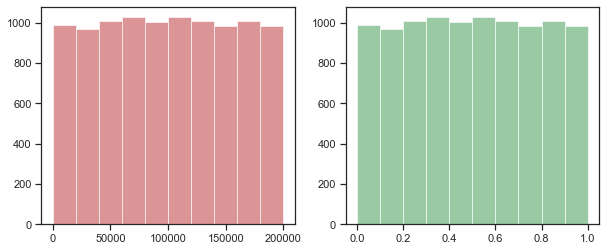

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].hist(data["EstimatedSalary"], color="r", alpha=0.6)
axs[1].hist(data_scaled2["EstimatedSalary"], color="g", alpha=0.6)
plt.show()

По максимальному значению

In [66]:
scaler3 = RobustScaler()
data_scaled3 = pd.DataFrame(scaler3.fit_transform(data_to_scale), columns=data_to_scale.columns)
data_scaled3.describe()

,Balance,EstimatedSalary
count,1.000000e+04,10000.000000
mean,-1.622686e-01,-0.001054
std,4.888384e-01,0.584539
min,-7.614800e-01,-1.018257
25%,-7.614800e-01,-0.499987
50%,-5.700193e-17,0.000000
75%,2.385200e-01,0.500013
max,1.204124e+00,1.014356


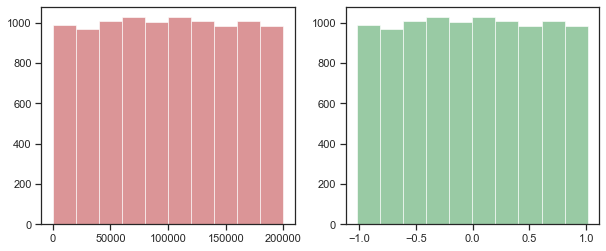

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].hist(data["EstimatedSalary"], color="r", alpha=0.6)
axs[1].hist(data_scaled3["EstimatedSalary"], color="g", alpha=0.6)
plt.show()

Обработка выбросов

In [68]:
from enum import Enum
# Тип вычисления верхней и нижней границы выбросов 
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, outlier_boundary_type: OutlierBoundaryType):     
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:         
        K1 = 3         
        lower_boundary = df.mean() - (K1 * df.std())         
        upper_boundary = df.mean() + (K1 * df.std())
    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df.quantile(0.05)         
        upper_boundary = df.quantile(0.95)
    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df.quantile(0.75) - df.quantile(0.25)         
        lower_boundary = df.quantile(0.25) - (K2 * IQR)         
        upper_boundary = df.quantile(0.75) + (K2 * IQR)     
    return lower_boundary, upper_boundary  

In [69]:
data2 = data_scaled3.copy()

OutlierBoundaryType.SIGMA


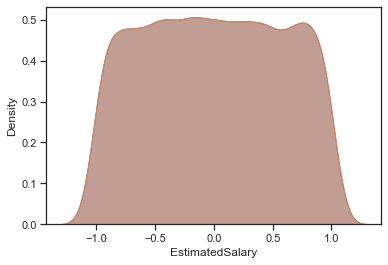

OutlierBoundaryType.QUANTILE


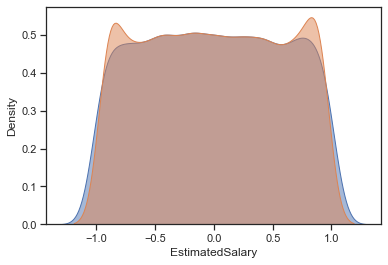

OutlierBoundaryType.IRQ


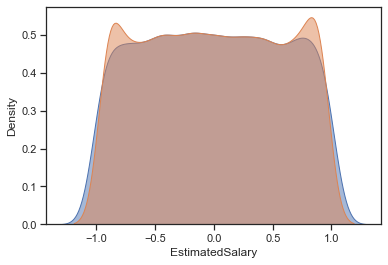

In [70]:
for obt in OutlierBoundaryType:
    lower_boundary, upper_boundary = get_outlier_boundaries(data_scaled3['EstimatedSalary'], obt)

    data2['EstimatedSalary'] = np.where(data_scaled3['EstimatedSalary'] > upper_boundary, upper_boundary,
                                  np.where(data2['EstimatedSalary'] < lower_boundary, lower_boundary,
                                                    data2['EstimatedSalary']))
    sns.kdeplot(data_scaled3['EstimatedSalary'], alpha=0.5, fill=True)
    sns.kdeplot(data2['EstimatedSalary'], alpha=0.5, fill=True)
    print(obt)
    plt.show()

Удаление выбросов

OutlierBoundaryType.SIGMA


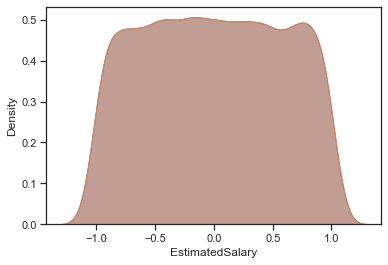

OutlierBoundaryType.QUANTILE


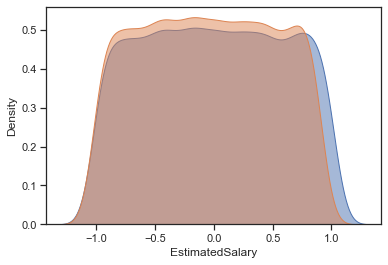

OutlierBoundaryType.IRQ


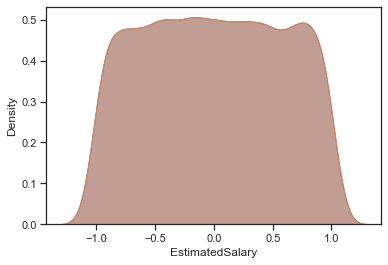

In [71]:
for obt in OutlierBoundaryType:
    lower_boundary, upper_boundary = get_outlier_boundaries(data_scaled3['EstimatedSalary'], obt)
    temp_df = np.where(data_scaled3['EstimatedSalary'] > upper_boundary, True,
                                np.where(data2['EstimatedSalary'] < lower_boundary, True, False))
    data_trimmed = data_scaled3.loc[~(temp_df), ]
    sns.kdeplot(data_scaled3['EstimatedSalary'], alpha=0.5, fill=True)
    sns.kdeplot(data_trimmed['EstimatedSalary'], alpha=0.5, fill=True)
    print(obt)
    plt.show()


Отбор признаков

In [72]:
# Удаление коррелирующих признаков

In [73]:
wine = load_wine()
data = pd.DataFrame(data=wine.data, columns= wine.feature_names)
y = wine['target']

In [74]:
data['alcohol_2'] = data['alcohol'] + np.random.rand(len(data['alcohol']))
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcohol_2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,14.450588
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,13.834093
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,13.867882
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,14.458314
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,14.025412


In [75]:
def make_corr_df(data):
    cr = data.corr()
    cr = cr.abs().unstack()
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.80]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []
    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups



In [76]:
corr_df = make_corr_df(data) 
print(corr_df) 
corr_groups(corr_df)

              f1             f2      corr
0        alcohol      alcohol_2  0.937245
1      alcohol_2        alcohol  0.937245
2     flavanoids  total_phenols  0.864564
3  total_phenols     flavanoids  0.864564


[['alcohol_2', 'alcohol'], ['total_phenols', 'flavanoids']]

Метод обёртывания

In [77]:
from sklearn.neighbors import KNeighborsClassifier 
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS 
knn = KNeighborsClassifier(n_neighbors=3)
efs1 = EFS(knn,
            min_features=2,
            max_features=4,
            scoring='accuracy',
            print_progress=True,
            cv=5)
efs1 = efs1.fit(data, y)

Features: 1456/1456

In [78]:
print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset:', efs1.best_feature_names_)

Best accuracy score: 0.94
Best subset: ('alcohol', 'total_phenols', 'flavanoids', 'color_intensity')


Метод Вложений

In [79]:
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(data, y)
e_lr1.coef_

array([[ 7.17648954e-01,  4.54715366e+00,  1.79166689e+01,
        -2.37347111e+00,  1.06874234e-02,  3.55350512e-01,
         9.17079642e+00,  0.00000000e+00, -5.33219296e+00,
        -1.31500548e+00, -6.20093824e+00,  2.32764141e+00,
         6.22036096e-02,  9.05298436e-01],
       [-6.78797065e-01, -3.27285624e+00, -1.74065140e+01,
         1.45943555e+00, -4.27677239e-02,  1.42249410e+00,
         2.70522866e+00,  1.42977760e+01,  3.50088926e+00,
        -6.46923572e+00,  2.35765830e+01, -3.98905510e+00,
        -4.15178762e-02, -7.97731130e-01],
       [ 1.25661133e-01,  9.75917803e-01,  1.07945627e+00,
         1.24523093e-01,  2.36929237e-02, -5.38665639e-01,
        -6.29871199e+00, -5.39669186e+00, -2.08080472e+00,
         1.51833330e+00, -5.48393053e+00, -2.66846449e+00,
         2.66907242e-03,  1.29646172e-01]])

In [82]:
from sklearn.feature_selection import SelectFromModel

sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(data, y)
sel_e_lr1.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

Обработка нестандартного признака

In [89]:
data3 = pd.read_csv('countryLockdowndates.csv', sep=",")
print(data.shape)
data.head()

(307, 5)


,Country/Region,Province,Date,Type,Reference
0,Afghanistan,NaN,24/03/2020,Full,https://www.thestatesman.com/world/afghan-govt...
1,Albania,NaN,08/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
2,Algeria,NaN,24/03/2020,Full,https://www.garda.com/crisis24/news-alerts/325...
3,Andorra,NaN,16/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
4,Angola,NaN,24/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...


In [90]:
# Сконвертируем дату и время в нужный формат
data3["Date"] = data3.apply(lambda x: pd.to_datetime(x["Date"], format='%d/%m/%Y'), axis=1)

In [91]:
data3.head(5)

,Country/Region,Province,Date,Type,Reference
0,Afghanistan,NaN,2020-03-24,Full,https://www.thestatesman.com/world/afghan-govt...
1,Albania,NaN,2020-03-08,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
2,Algeria,NaN,2020-03-24,Full,https://www.garda.com/crisis24/news-alerts/325...
3,Andorra,NaN,2020-03-16,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
4,Angola,NaN,2020-03-24,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
